# EDA on NYC-Flight data


## Exploration ideas: 
* Departure delays. 
* Best airports in terms of time departure %. 
* Aircraft speed analysis.
* On time arrival % analysis. 
* Maximum number of flights headed to some particular destination.

In [5]:
import numpy as np          # linear algebra
import pandas as pd         # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt      #for graphing
%matplotlib inline
import seaborn as sns        #for Plotting
local_path = "C:/Users/Aravind/Desktop/UpX Academy/Data Science Track - 01/PROJECTS TO BE DOING/Project Datasets/Project_1_NYC-Flight_data/flight_data.csv"
input_data = pd.read_csv(local_path)                           #load CSV file from local directory
input_data.head()                                         # Preview the first 5 lines of the loaded data

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,01-01-2013 05:00
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,01-01-2013 05:00
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,01-01-2013 05:00
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,01-01-2013 05:00
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,01-01-2013 06:00


In [8]:
df= pd.DataFrame(input_data)          
#display(data)
df.isnull().sum(axis = 0) 

year                 0
month                0
day                  0
dep_time          8255
sched_dep_time       0
dep_delay         8255
arr_time          8713
sched_arr_time       0
arr_delay         9430
carrier              0
flight               0
tailnum           2512
origin               0
dest                 0
air_time          9430
distance             0
hour                 0
minute               0
time_hour            0
dtype: int64

In [3]:
df= pd.DataFrame(input_data)   
df.describe()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,flight,air_time,distance,hour,minute
count,336776.0,336776.000000,336776.000000,328521.000000,336776.000000,328521.000000,328063.000000,336776.000000,327346.000000,336776.000000,327346.000000,336776.000000,336776.000000,336776.000000
mean,2013.0,6.548510,15.710787,1349.109947,1344.254840,12.639070,1502.054999,1536.380220,6.895377,1971.923620,150.686460,1039.912604,13.180247,26.230100
std,0.0,3.414457,8.768607,488.281791,467.335756,40.210061,533.264132,497.457142,44.633292,1632.471938,93.688305,733.233033,4.661316,19.300846
min,2013.0,1.000000,1.000000,1.000000,106.000000,-43.000000,1.000000,1.000000,-86.000000,1.000000,20.000000,17.000000,1.000000,0.000000
25%,2013.0,4.000000,8.000000,907.000000,906.000000,-5.000000,1104.000000,1124.000000,-17.000000,553.000000,82.000000,502.000000,9.000000,8.000000
50%,2013.0,7.000000,16.000000,1401.000000,1359.000000,-2.000000,1535.000000,1556.000000,-5.000000,1496.000000,129.000000,872.000000,13.000000,29.000000
75%,2013.0,10.000000,23.000000,1744.000000,1729.000000,11.000000,1940.000000,1945.000000,14.000000,3465.000000,192.000000,1389.000000,17.000000,44.000000
max,2013.0,12.000000,31.000000,2400.000000,2359.000000,1301.000000,2400.000000,2359.000000,1272.000000,8500.000000,695.000000,4983.000000,23.000000,59.000000


C:\Users\Aravind\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


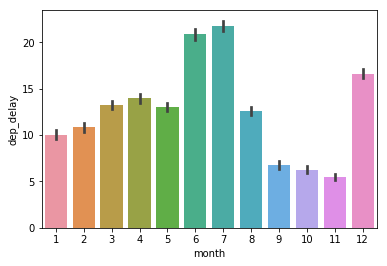

In [4]:
#plot Month vs dept_delay     

# column in data set having NaN values: 'dep_time', 'dep_delay', 'arr_time', 'arr_delay', 'tailnum', 'air_time' 
#df.describe(include=[np.number])                     #Including only numeric columns in a DataFrame description.


#df[["dep_time", "dep_delay","arr_time", "arr_delay","air_time"]] = df[["dep_time", "dep_delay","arr_time", "arr_delay","air_time"]].fillna(df["dep_time", "dep_delay","arr_time", "arr_delay","air_time"].mean())


sns.barplot(x=input_data.month,y=input_data.dep_delay)

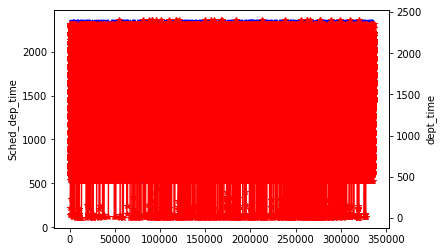

In [5]:
# plot Sched_dep_time vs dept_time
fig, ax1 = plt.subplots()
times = range(336776)

ax1.plot(times,input_data.sched_dep_time,"b--")
ax1.set_ylabel("Sched_dep_time")
ax2 = ax1.twinx()
ax2.plot(times, input_data.dep_time, "r*-")
ax2.set_ylabel("dept_time")
plt.show()

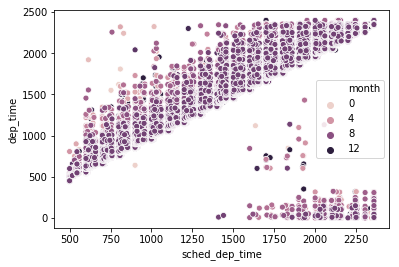

In [6]:
#scatter plot sched_dep_time vs actual dep_time

#xline = input_data.sched_dep_time.sample(50)
#yline= input_data.dep_time.sample(50)
sns.scatterplot(x=input_data.sched_dep_time, y=input_data.dep_time, hue=input_data.month)


In [7]:
# flights headed to some particular destination.
sns.set(rc={'figure.figsize':(15.00,100.00)})
flight_count = input_data.groupby(['dest']).size()
flight_count = flight_count.reset_index(name = 'total_flight')
#flight_count.sort_values(by=['total_flight'], ascending=True)
flight_count

,dest,total_flight
0,ABQ,254
1,ACK,265
2,ALB,439
3,ANC,8
4,ATL,17215
5,AUS,2439
6,AVL,275
7,BDL,443
8,BGR,375
9,BHM,297


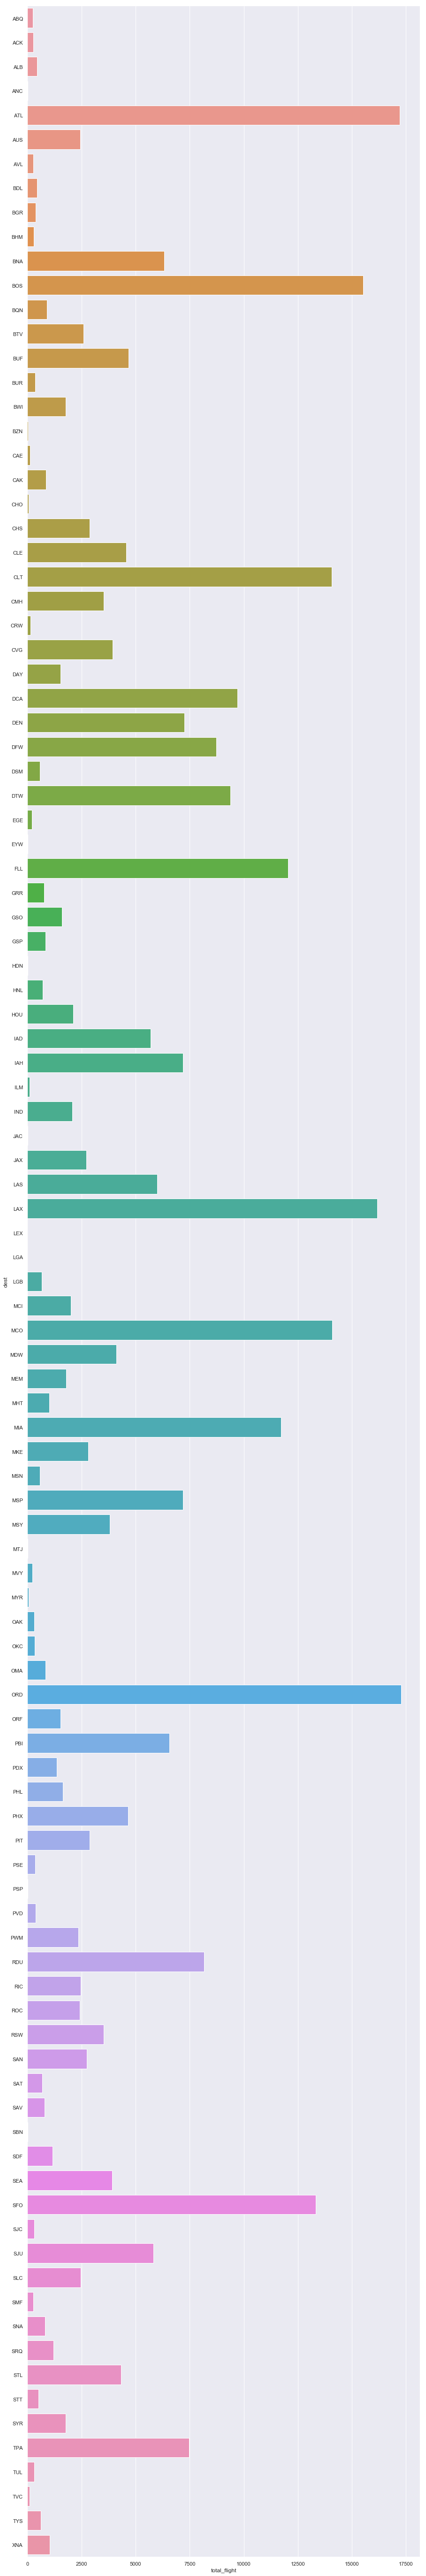

In [8]:
#barplot flight count vs dest code
flight_count = input_data.groupby(['dest']).size()
flight_count = flight_count.reset_index(name = 'total_flight')
flight_count.sort_values(by=['total_flight'], ascending=[False])
flight_count
image = sns.barplot(x=flight_count.total_flight ,y=flight_count.dest)
image.figure.savefig("output.png")
#Maximum number of flights to a destination
#max_flight_count = flight_count.max()
#max_flight_count[max_flight_count.iloc[:,1] == max_flight_count.iloc[:,1].max()]
#print(max_flight_count)


In [ ]:
#Plot Flight Vs. Flight On Time
sns.set(style="ticks", palette="pastel")
# Draw a nested boxplot to show Flight On Time and flight
sns.boxplot(x=input_data.flight,y=input_data.sched_arr_time,hue=input_data.arr_time, palette=["m", "g"],)
sns.despine(offset=10, trim=True)

In [ ]:
input_data.head()

In [ ]:
# Best airports in terms of time departure
import pandas as pd


total_fligh_from_ariport = input_data.groupby(['origin']).size()
total_fligh_from_ariport = total_fligh_from_ariport.reset_index(name = 'total_flight')
print(total_fligh_from_ariport.head())

flight_on_time = input_data[(input_data['dep_delay'] == 0)]
flight_on_time.head()
total_ontime_flight_dep_originwise = flight_on_time.groupby(['origin']).size()
# print(total_ontime_flight_dep_originwise)

# print('Total On time flight departure count for each origin port.')
tot_ontime_count_each_origin = total_ontime_flight_dep_originwise.reset_index(name = 'count')
# print(tot_ontime_count_each_origin)

data = pd.merge(total_fligh_from_ariport,tot_ontime_count_each_origin,on='origin',how='inner')
# print(mdata)

data['Percentage'] = data.iloc[:,2]/data.iloc[:,1]*100
print(data)

print(data[data.iloc[:,3] == data.iloc[:,3].max()])